# Step 1:  Load the dataset

In [172]:
# Import neccessary libraries
import numpy as np  # For numerical operations
import pandas as pd # For data manipulation
#matplotlib and seaborn: For visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
import os

# List all filese in the dataset directory
dataset_dir = '/kaggle/input/predict-online-gaming-behavior-dataset'
print(os.listdir(dataset_dir))

['online_gaming_behavior_dataset.csv']


In [174]:
file_path = '/kaggle/input/predict-online-gaming-behavior-dataset/online_gaming_behavior_dataset.csv'
data = pd.read_csv(file_path)

# Step 2: EDA(Exploratory Data Analysis)

Exploratory Data Analysis (EDA) helps understand the structure, patterns, and relationships in your dataset. This step ensures your data is suitable for machine learning and identifies any required preprocessing or modifications.

## Step-by-Step Guide to EDA:

We’ll cover the following steps:

    Understand the Dataset: Overview of shape, columns, and data types.
    Check for Missing Values.
    Summary Statistics.
    Class Distribution (for target variable).
    Explore Relationships between Features and Target.
    Visualize Data (correlations, distributions, etc.).

In [175]:
print("\nSample Data:\n", data.head())


Sample Data:
    PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0    

In [176]:
print(data.info())  # Information about columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [177]:
# Step 1: Dataset Overview
print("Dataset Shape : ", data.shape) # Rows and columns

Dataset Shape :  (40034, 13)


In [178]:
print("/nColumns/n : ", data.columns)

/nColumns/n :  Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')


In [179]:
print("\nData Types:\n", data.dtypes)


Data Types:
 PlayerID                       int64
Age                            int64
Gender                        object
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object


In [180]:
# Step 2: Check for Missing Values
print("\nMissing Values :\n", data.isnull().sum())


Missing Values :
 PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64


In [181]:
# Step 3: Summary Statistics
print("\nSummary Statictics :\n", data.describe())


Summary Statictics :
            PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  40034.000000  40034.000000   40034.000000     40034.000000   
mean   29016.500000     31.992531      12.024365         0.200854   
std    11556.964675     10.043227       6.914638         0.400644   
min     9000.000000     15.000000       0.000115         0.000000   
25%    19008.250000     23.000000       6.067501         0.000000   
50%    29016.500000     32.000000      12.008002         0.000000   
75%    39024.750000     41.000000      17.963831         0.000000   
max    49033.000000     49.000000      23.999592         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     40034.000000               40034.000000  40034.000000   
mean          9.471774                  94.792252     49.655568   
std           5.763667                  49.011375     28.588379   
min           0.000000                  10.000000      1.000000   
25%           4.0000


Target Variable Distribution:
 
EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64


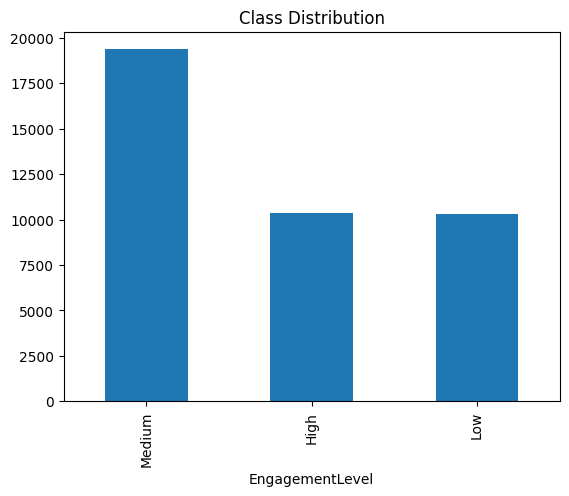

In [182]:
# Step 4: Class Distribution (for Target Variable)
print("\nTarget Variable Distribution:\n ")
print(data['EngagementLevel'].value_counts())
data['EngagementLevel'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

# Unique values of each Categorical features 

In [183]:
# Identify categorical and numerical columns
cat_columns = data.select_dtypes(include=['object']).columns
num_columns = data.select_dtypes(include=['int64', 'float64']).columns

In [184]:
cat_columns

Index(['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel'], dtype='object')

In [185]:
num_columns

Index(['PlayerID', 'Age', 'PlayTimeHours', 'InGamePurchases',
       'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel',
       'AchievementsUnlocked'],
      dtype='object')

In [186]:
data.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [187]:
# Loop through each categorical column and print its unique values
for col in cat_columns:
    unique_values = data[col].unique()
    print(f"Unique values in '{col}': {unique_values}\n")


Unique values in 'Gender': ['Male' 'Female']

Unique values in 'Location': ['Other' 'USA' 'Europe' 'Asia']

Unique values in 'GameGenre': ['Strategy' 'Sports' 'Action' 'RPG' 'Simulation']

Unique values in 'GameDifficulty': ['Medium' 'Easy' 'Hard']

Unique values in 'EngagementLevel': ['Medium' 'High' 'Low']



In [188]:
# Manually map each categorical column
for col in cat_columns:
    unique_values = data[col].unique()  # Get unique category names
    mapping = {value: idx for idx, value in enumerate(unique_values)}  # Map category to a number
    data[col] = data[col].map(mapping)  # Apply mapping to the data
    print(f"Mapping for '{col}': {mapping}\n")  # Display the mapping


Mapping for 'Gender': {'Male': 0, 'Female': 1}

Mapping for 'Location': {'Other': 0, 'USA': 1, 'Europe': 2, 'Asia': 3}

Mapping for 'GameGenre': {'Strategy': 0, 'Sports': 1, 'Action': 2, 'RPG': 3, 'Simulation': 4}

Mapping for 'GameDifficulty': {'Medium': 0, 'Easy': 1, 'Hard': 2}

Mapping for 'EngagementLevel': {'Medium': 0, 'High': 1, 'Low': 2}



## Preprocess the Data

Why: Neural networks require clean and normalized data. We handle missing values, encode categorical variables, and scale numeric values.

Actions:

Handle missing values (if any).
Encode categorical variables using one-hot encoding.
Normalize numeric features to a 0-1 range using Min-Max scaling.



In [189]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features and target
x = data.drop('EngagementLevel', axis=1)
y = data['EngagementLevel']

In [190]:
x.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'],
      dtype='object')

In [191]:
x.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,9000,43,0,0,0,16.271119,0,0,6,108,79,25
1,9001,29,1,1,0,5.525961,0,0,5,144,11,10
2,9002,22,1,1,1,8.223755,0,1,16,142,35,41
3,9003,35,0,1,2,5.265351,1,1,9,85,57,47
4,9004,33,0,2,2,15.531945,0,0,2,131,95,37


In [192]:
y

0        0
1        0
2        1
3        0
4        0
        ..
40029    0
40030    1
40031    1
40032    0
40033    0
Name: EngagementLevel, Length: 40034, dtype: int64

In [193]:
type(x)

pandas.core.frame.DataFrame

In [194]:
type(y)

pandas.core.series.Series

In [196]:
# y_array = y.to_numpy()

In [197]:
"""
# Find indices of each category
medium_indices = np.where(y_array == 'Medium')[0]
high_indices = np.where(y_array == 'High')[0]
low_indices = np.where(y_array == 'Low')[0]

# Ensure each category has exactly 9000 samples
# If a category has fewer than 9000 samples, it will use all available samples
selected_medium_indices = medium_indices[:9000]
selected_high_indices = high_indices[:9000]
selected_low_indices = low_indices[:9000]

# Combine the selected indices
final_indices = np.concatenate((selected_medium_indices, selected_high_indices, selected_low_indices))

# Shuffle indices to randomize
np.random.shuffle(final_indices)

# Select the final dataset

data = data.iloc[final_indices]
# Verify the counts
print(data['EngagementLevel'].value_counts())

"""

"\n# Find indices of each category\nmedium_indices = np.where(y_array == 'Medium')[0]\nhigh_indices = np.where(y_array == 'High')[0]\nlow_indices = np.where(y_array == 'Low')[0]\n\n# Ensure each category has exactly 9000 samples\n# If a category has fewer than 9000 samples, it will use all available samples\nselected_medium_indices = medium_indices[:9000]\nselected_high_indices = high_indices[:9000]\nselected_low_indices = low_indices[:9000]\n\n# Combine the selected indices\nfinal_indices = np.concatenate((selected_medium_indices, selected_high_indices, selected_low_indices))\n\n# Shuffle indices to randomize\nnp.random.shuffle(final_indices)\n\n# Select the final dataset\n\ndata = data.iloc[final_indices]\n# Verify the counts\nprint(data['EngagementLevel'].value_counts())\n\n"

### balance the dataset for fair analysis or modeling by addressing the class imbalance issue in the target variable.
Reducing Target Variable Categories (Balancing Data)

    Objective:
        To reduce the instances in the EngagementLevel column so that each category (Medium, High, and Low) contains exactly 9000 samples.

    Steps Taken:
        Converted the EngagementLevel column to a NumPy array using to_numpy() for array slicing.
        Used np.where() to identify indices of each category in the array.
        Sliced the first 9000 indices for each category using array slicing ([:9000]).
        Combined the selected indices for all categories using np.concatenate().
        Randomized the combined indices using np.random.shuffle().
        Extracted the corresponding rows from the original dataset using data.iloc[final_indices].
        Verified the balanced counts using value_counts().

    Outcome:
        Created a balanced dataset with 9000 samples for each category (Medium, High, Low).

Correlation Matrix:
                            PlayerID       Age    Gender  Location  GameGenre  \
PlayerID                   1.000000 -0.003044  0.001847  0.002313   0.004143   
Age                       -0.003044  1.000000  0.002075 -0.002401   0.002217   
Gender                     0.001847  0.002075  1.000000 -0.003159   0.001076   
Location                   0.002313 -0.002401 -0.003159  1.000000   0.004365   
GameGenre                  0.004143  0.002217  0.001076  0.004365   1.000000   
PlayTimeHours              0.000923  0.002462 -0.006514  0.005891  -0.006685   
InGamePurchases            0.002321 -0.000186 -0.006198  0.008877  -0.006840   
GameDifficulty            -0.002498 -0.000206  0.006139  0.003024   0.008296   
SessionsPerWeek           -0.005944  0.008777  0.006491  0.002385  -0.007210   
AvgSessionDurationMinutes -0.001801 -0.002269  0.003175 -0.004004  -0.008959   
PlayerLevel               -0.001769  0.001353 -0.006645 -0.003875  -0.008736   
AchievementsUnlocke

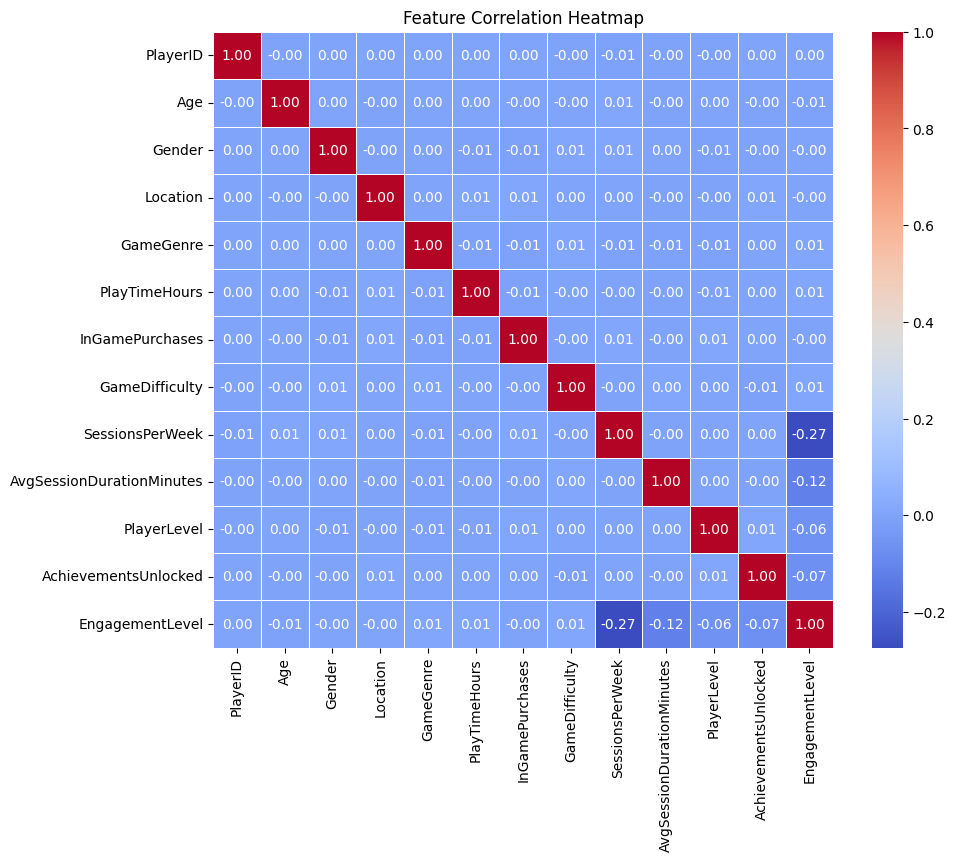

In [201]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [202]:
correlation_matrix

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
PlayerID,1.000000,-0.003044,0.001847,0.002313,0.004143,0.000923,0.002321,-0.002498,-0.005944,-0.001801,-0.001769,0.003190,0.004483
Age,-0.003044,1.000000,0.002075,-0.002401,0.002217,0.002462,-0.000186,-0.000206,0.008777,-0.002269,0.001353,-0.001100,-0.008148
Gender,0.001847,0.002075,1.000000,-0.003159,0.001076,-0.006514,-0.006198,0.006139,0.006491,0.003175,-0.006645,-0.003772,-0.000191
Location,0.002313,-0.002401,-0.003159,1.000000,0.004365,0.005891,0.008877,0.003024,0.002385,-0.004004,-0.003875,0.005301,-0.000297
GameGenre,0.004143,0.002217,0.001076,0.004365,1.000000,-0.006685,-0.006840,0.008296,-0.007210,-0.008959,-0.008736,0.000672,0.008765
PlayTimeHours,0.000923,0.002462,-0.006514,0.005891,-0.006685,1.000000,-0.006067,-0.000010,-0.003655,-0.001925,-0.005152,0.003913,0.009245
InGamePurchases,0.002321,-0.000186,-0.006198,0.008877,-0.006840,-0.006067,1.000000,-0.003561,0.005132,-0.003059,0.006524,0.000098,-0.001145
GameDifficulty,-0.002498,-0.000206,0.006139,0.003024,0.008296,-0.000010,-0.003561,1.000000,-0.001241,0.004783,0.002718,-0.012966,0.007990
SessionsPerWeek,-0.005944,0.008777,0.006491,0.002385,-0.007210,-0.003655,0.005132,-0.001241,1.000000,-0.000620,0.003257,0.003187,-0.274253
AvgSessionDurationMinutes,-0.001801,-0.002269,0.003175,-0.004004,-0.008959,-0.001925,-0.003059,0.004783,-0.000620,1.000000,0.001368,-0.002227,-0.118059


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

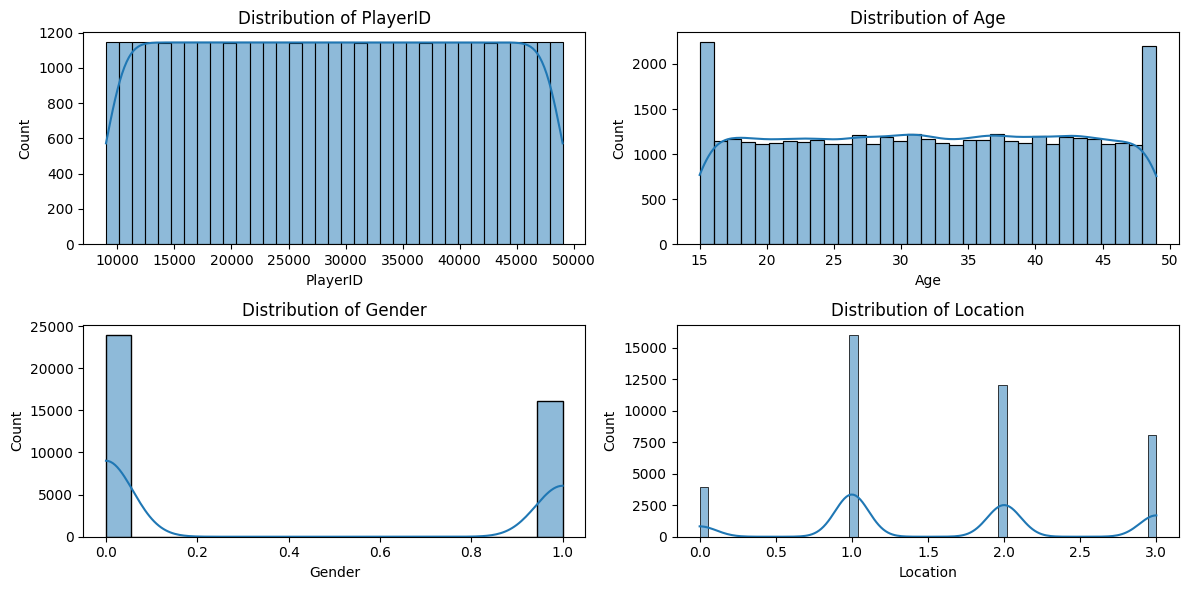

In [203]:
# Step 6: Visualize Distributions (for Key Features)
plt.figure(figsize=(12, 6))
for i, column in enumerate(data.select_dtypes(include=[np.number]).columns[:4]):  # First 4 numerical columns
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

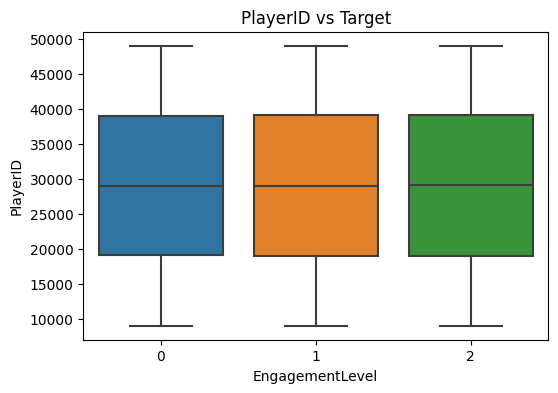

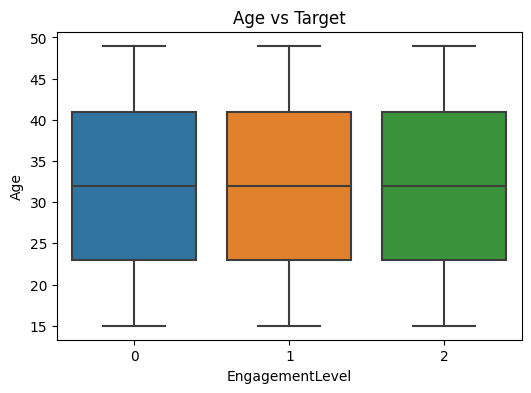

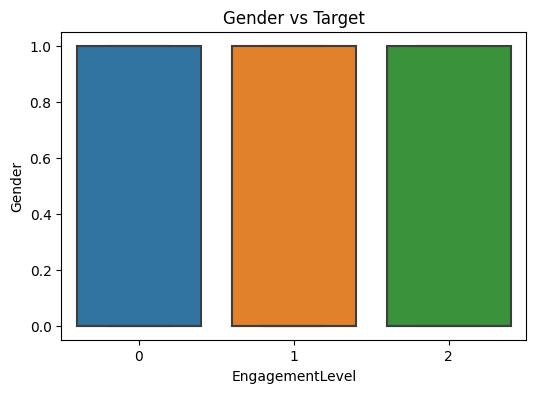

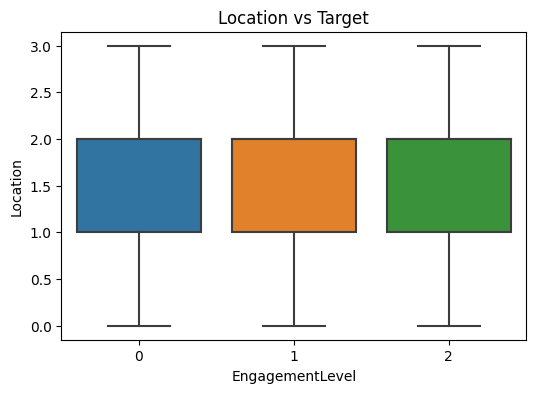

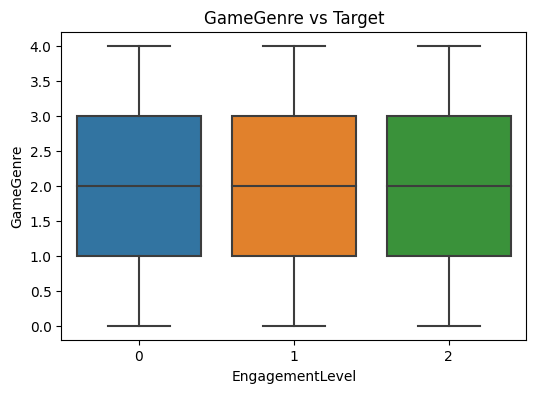

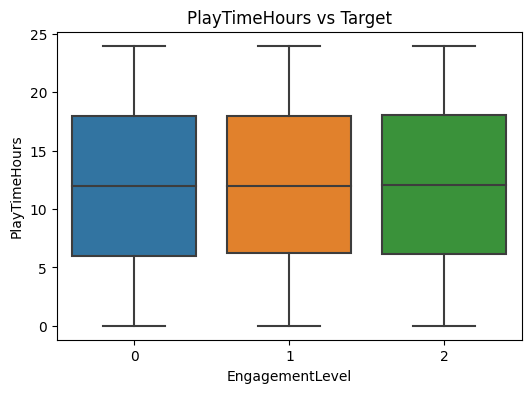

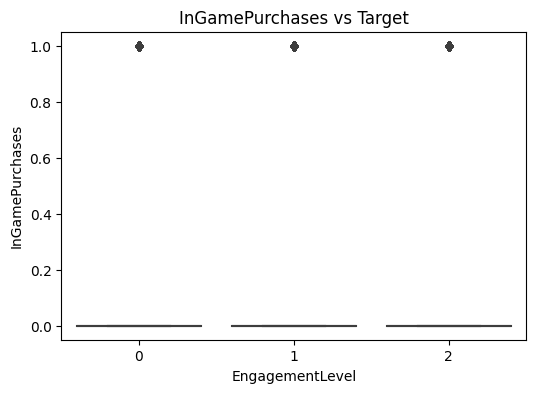

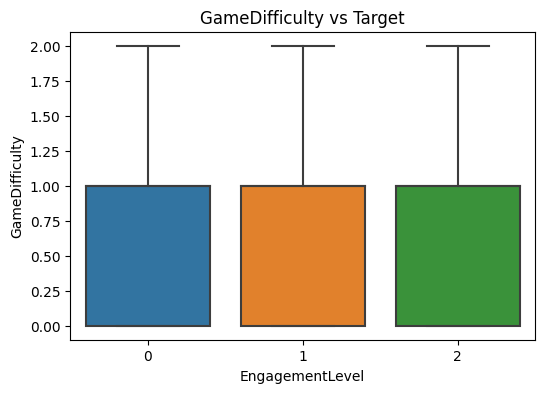

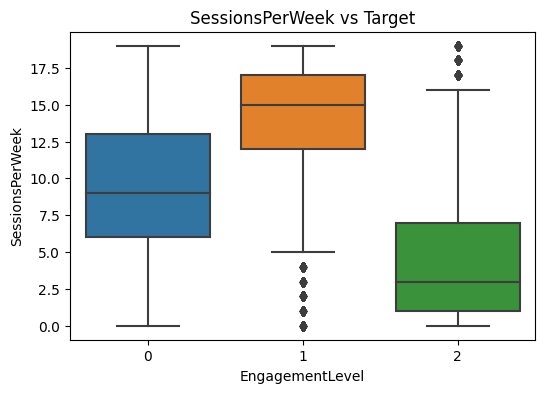

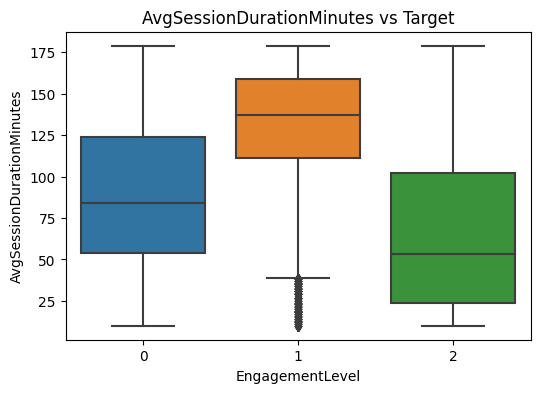

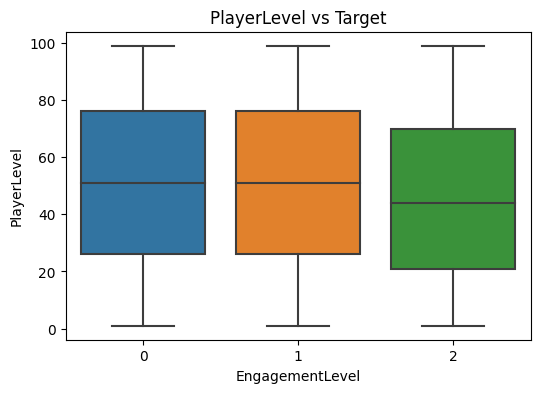

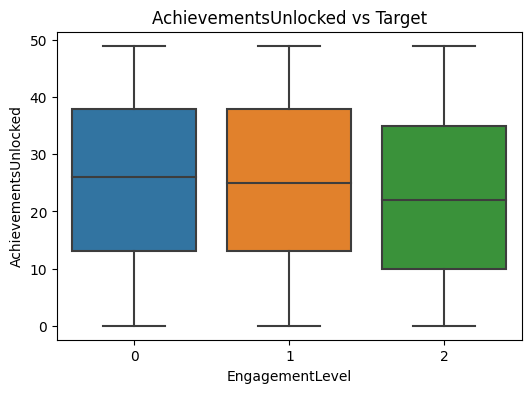

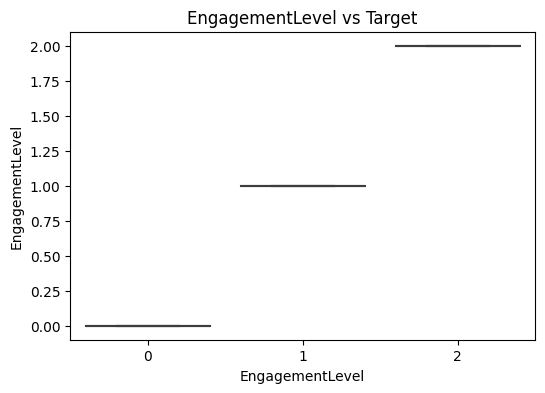

In [204]:
# Step 7: Relationship with Target Variable
# Example: Boxplot for numerical features against target
for column in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data['EngagementLevel'], y=data[column])  # Replace with your target column
    plt.title(f"{column} vs Target")
    plt.show()

# Step 3: Split the Data

Why: Splitting the data into training and testing sets helps evaluate the model's performance on unseen data.

In [206]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f'Training set size : {x_train.shape}')
print(f'Testing set size : {x_test.shape}')


Training set size : (32027, 12)
Testing set size : (8007, 12)


In [207]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert y_train and y_test to numeric labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Convert the numeric labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train_encoded, num_classes=3)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=3)

# Step 4: Build the Neural Network

Why: Neural networks are built layer by layer, with an input layer, hidden layers, and an output layer.

Actions:

    Use TensorFlow and Keras to build the model.
    Use ReLU activation for hidden layers and a softmax activation for the output layer  

In [208]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network
model = Sequential([
    Dense(64, activation='relu',  input_dim=x_train.shape[1]), # Input layer
    Dense(32, activation='relu'), # Hidden layer
    Dense(3,activation='softmax') # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,011 (11.76 KB)

 Trainable params: 3,011 (11.76 KB)

 Non-trainable params: 0 (0.00 B)

None


# Step 5: Train the Model

Why: Training optimizes the model parameters using backpropagation and gradient descent.

In [209]:
# Train the model
trained_model = model.fit(x_train, y_train_one_hot, epochs=150, batch_size=32, validation_data=(x_test, y_test_one_hot))

Epoch 1/150
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3865 - loss: 139.9535 - val_accuracy: 0.5076 - val_loss: 46.0502
Epoch 2/150
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4218 - loss: 39.8256 - val_accuracy: 0.2552 - val_loss: 56.3942
Epoch 3/150
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4286 - loss: 37.8951 - val_accuracy: 0.4454 - val_loss: 70.0963
Epoch 4/150
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4453 - loss: 39.6084 - val_accuracy: 0.5549 - val_loss: 25.5433
Epoch 5/150
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4739 - loss: 26.4140 - val_accuracy: 0.5018 - val_loss: 29.7580
Epoch 6/150
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4801 - loss: 24.6995 - val_accuracy: 0.4862 - val_loss: 46.1802
Epoch 7/150
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4841 - loss: 23.9448 - val_accuracy: 0.5026 - val_loss: 28.0886
Epoch 8/150
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0

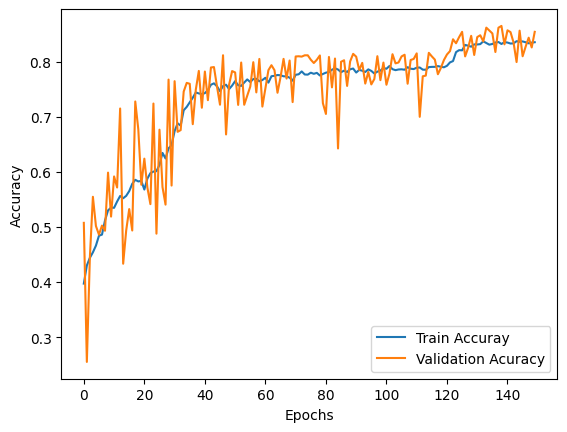

In [210]:
# Plot trained model
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(trained_model.history['accuracy'], label='Train Accuray')
plt.plot(trained_model.history['val_accuracy'], label='Validation Acuracy')

# Add axis labels
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis

plt.legend()
plt.show()


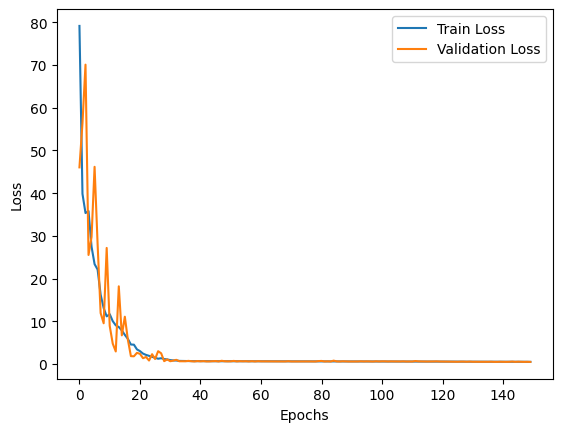

In [211]:
# Loss plot
plt.plot(trained_model.history['loss'], label='Train Loss')
plt.plot(trained_model.history['val_loss'], label='Validation Loss')

# Add axis labels
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis

plt.legend()
plt.show()